## 4.2 Loss function (Cost function)
### 오차제곱합 (SSE):
$$ E = \frac{1}{2} \sum_k (y_k - t_k)^2 $$
- $y_k$: 신경망의 출력 (가설)
- $t_k$: 정답 레이블
- k: 데이터의 차원 수


In [18]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [19]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

sum_squares_error(y, t)

0.09750000000000003

In [20]:
y = np.array([0.1, 0.05, 0.3, 0.0, 0.05, 0.1, 0.0, 0.1, 0.3, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

sum_squares_error(y, t)

0.30749999999999994

### 교차 엔트로피 오차 (CEE):
$$ E = -\sum_k t_k log y_k $$
- $t_k = 1$ 즉 정답일 때 추정 $y_k$의 자연로그 ($log_e$)

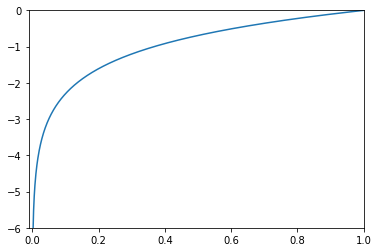

In [21]:
import matplotlib.pyplot as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.xlim(-0.01, 1.0)
plt.ylim(-6, 0)
plt.show()

In [22]:
def cross_entropy_error(y, t):
    # log(0) = -inf 오버플로우 피하기 위해 작은 값 delta 더함
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [23]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

cross_entropy_error(y, t)

0.510825457099338

In [24]:
y = np.array([0.1, 0.05, 0.3, 0.0, 0.05, 0.1, 0.0, 0.1, 0.3, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

cross_entropy_error(y, t)

1.2039724709926583

$$ E = -\frac{1}{N} \sum_n \sum_k t_{nk} log y_{nk} $$
- N: 데이터 개수
- $t_{nk}$: n번째 데이터의 k번째 값
- $y_{nk}$: 신경망의 출력
- $t_{nk}$: 정답 레이블

In [25]:
# 미니배치 학습

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [26]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

batch_mask # 랜덤 선택된 이미지 인덱스

array([37236, 46630,  1131,  1379,  2810, 22172, 27603, 15584, 54204,
       48473])

In [27]:
# 레이블이 원-핫 인코딩일 때

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [28]:
# 레이블이 숫자로 주어질 때

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [29]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [30]:
y = np.array([[0.1, 0.05, 0.8, 0.0, 0.05, 0.1, 0.2, 0.1, 0.0, 0.0],
            [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
            [0.5, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]])
t = [2, 3, 0]

print([np.arange(3), t])
print(y[np.arange(3), t], '(= y[0, 2], y[1, 3], y[2, 0])')
print(np.log(y[np.arange(3), t] + 1e-7))

[array([0, 1, 2]), [2, 3, 0]]
[0.8 0.  0.5] (= y[0, 2], y[1, 3], y[2, 0])
[ -0.22314343 -16.11809565  -0.69314698]


## 4.3 수치 미분

In [31]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [32]:
def square(x):
    return x**2

numerical_diff(square, 3)

6.000000000012662

In [33]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [34]:
numerical_diff(function_1, 5)

0.1999999999990898

In [35]:
numerical_diff(function_1, 10)

0.2999999999986347

In [36]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x  # x=x일때의 원래함수-기울기함수
    print(y)
    return lambda t: d*t + y  # 더해줌으로서 접점

In [37]:
tf = tangent_line(function_1, 5)

0.1999999999990898
-0.24999999999544897


0.1999999999990898
-0.24999999999544897
0.2999999999986347
-0.9999999999863469


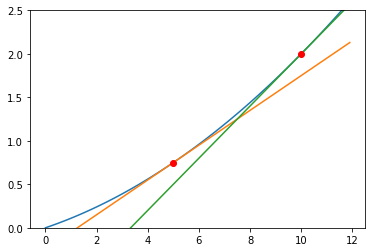

In [38]:
x = np.arange(0.0, 12.0, 0.1)
y = function_1(x)
t1 = (tangent_line(function_1, 5))(x)
t2 = (tangent_line(function_1, 10))(x)
plt.plot(x, y)
plt.plot(x, t1)
plt.plot(x, t2)
plt.plot(5, function_1(5), 'ro')
plt.plot(10, function_1(10), 'ro')
plt.ylim(0, 2.5)
plt.show()

In [39]:
def function_2(x):
    return x[0]**2 + x[1]**2
        #  np.sum(x**2)

## 4.4 기울기(gradient)
$$(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}, ... , \frac{\partial f}{\partial x_n})$$
- Gradient: 위와 같이 모든 변수의 편미분을 벡터로 정리한 것

- 전방 차분:
$$
\frac{f(x+h)-f(x)}{h}
$$

- 중심 차분 (중앙 차분):
$$
\frac{f(x+h)-f(x-h)}{2h}
$$

In [44]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 영행령 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [45]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

#### Gradient Method:
$$x_0 := x_0 - \eta \frac{\partial f}{\partial x_0}$$
$$x_1 := x_1 - \eta \frac{\partial f}{\partial x_1}$$
- $\eta$: learning rate

In [46]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [49]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [71]:
print('초기값: [-3.0, 4.0]')
for lr in [0.001, 0.01, 0.1, 1, 10]:
    init_x = np.array([-3.0, 4.0])
    print(lr, ': ', np.round(gradient_descent(function_2, init_x=init_x, lr=lr), 4))

초기값: [-3.0, 4.0]
0.001 :  [-2.4557  3.2743]
0.01 :  [-0.3979  0.5305]
0.1 :  [-0.  0.]
1 :  [-3.  4.]
10 :  [-2.58983747e+13 -1.29524862e+12]


- 학습률 너무 작으면 매우 작은 변화
- 학습률 너무 크면 발산